# iPython Introduction
## iPython Magic Commands
- prefixed by a '%' character (**line magic**) or '%%' (**cell magic**)
- `%run` runs external code (function are available in namespace afterwards)
- `%time` for simple runtime or `%%timeit` for multiple executions
- to suppress output, add `;` at the end of the line
- shell commands can be executed when preceeded by an `!`
## Other Magic Commands
### Available line magics:
```python
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode
```

### Available cell magics:
```python
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%ruby  %%script  %%sh  %%svg  %%sx  %%system  %%time  %%timeit  %%writefile
```

In [3]:
%time
print("hi")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
hi


In [4]:
%%timeit
x = "hi"

27.2 ns ± 8.95 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [5]:
%%html
<h1> Hi in HTML </h1 >

In [6]:
!pwd

/Users/moritz/Documents/Coding/PyCharm Projects/DataScience/DataScienceEducation/PythonForDataScienceHandbook


# Introduction to Numpy
## Python vs. Numpy
- python datatypes (like an int) are just cleverly disguised C-datatypes with some overhead
- numpys fixed datatype arrays save overhead

## Numpy Arrays
### Attributes

In [7]:
import numpy as np
a = np.array([[1,2,5], [10, 20, 50]])
print(a.ndim) # 2
print(a.size) # 6
print(a.shape) # (2, 3)

2
6
(2, 3)


### Slicing
- works just like stock python (index, negative index, etc.)
- multiple dimensions can be accessed via index-tuple: `print(a[0, 2])`
- *Note:* Slicing returns view, `.copy()` creates real copy
- Example: Reverse in every dimension

In [8]:
arr = np.array([[1,2,3],
                [4,5,6]])
arr[::-1, ::-1]

array([[6, 5, 4],
       [3, 2, 1]])

### UFuncs
- `np.multiply.reduce(x)` for reducing array
- `np.multiply.accumulate(x)` for storing intermediate steps of reduction
- for each function (e.g. `np.mean()`) numpy provides an NaN-Safe version: `np.nanmean()``
- Broadcasting enables calculation between not equally-sized arrays (like scalar numerical operations)

### Comparison, Masks, Boolean Logic
- boolean arrays can be used as mask
- one can also check if there are any/only `True` values: `.any()` or `.all()`
- Boolean operators on arrays **MUST** be the python **bitwise** operators:
    - AND: `&`
    - OR: `|`
    - NOT: `~`
    - XOR: `^`

### Other Numpy Array Stuff
- *Structured* arrays and *Record* arrays can store multiple data types
- Record arrays allow column access via an attribute, not only via dictionary key

# Pandas
## Basics
- Pandas Series are generalized NumPy arrays: They have an explicit index
- Pandas Series can be thought of as *specialized dictionaries* but the single type makes them more efficient

## Data Frames
- Data Frames can also be thought of as 2-dimensional numpy arrays
    - rows are indexed by df.index
    - columns are indexed by df.columns
###  The Index
- index structure can be thought of as *immutable array* or *ordered set*
- when slicing with an explicit index, the final element is **included**
    - when slicing with an implicit index, **it is not.**
- `.loc`, `.iloc` and `.ix` are special *indexer attributes* to make clear which index (explicit = `.loc`, implicit = `.iloc`) you are using
- `.ix` is a hybrid of these two

### Multiindex
- Can be created by using tuples as dict-keys for creating a data frame
- can be stacked and unstacked
- `.reset_index()` turns index labels into columns
    - the opposite is `.set_index([cols])` which uses `cols` as indeces.

### Operations on Data Frames
- using ufuncs with pandas preserves/aligns index 

## Combining Datasets
- by default, *concatenation* takes place row-wise
- join is just a merge on index. Therefore, merge is more versatile

# Split-Apply-Combine
## Groupby
- using `.aggregate(...)` on a groupby object can aggregate by multiple functions or specific functions per column
=> Aggregate returns a reduce version of the data, `.transform(...)` returns the long version (same shape as input)
- pandas can group by dictionary:
`df.groupby({'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}).sum()`

|           | d1| d2|
|    ---    |---|---|
|consonant  | 12| 19|
|vowel      |  3|  8|

- pandas can group by any **function** that gets index as input and outputs group

## Pivot Tables
- in pivot tables, one can slica by cutted data:

In [9]:
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:

df = sns.load_dataset("titanic")
f = pd.qcut(df.fare, 2)
pd.pivot_table(data=df, index=["sex", f], margins=True)

adult_male        age     alone       fare  \
sex    fare                                                            
female (-0.001, 14.454]     0.000000  25.441176  0.781818   9.866709   
       (14.454, 512.329]    0.000000  29.110795  0.196078  63.143749   
male   (-0.001, 14.454]     0.985163  29.792326  0.922849   8.337559   
       (14.454, 512.329]    0.854167  31.962821  0.416667  49.656371   
All                         0.478022  35.623187  0.428571  78.919735   

                             parch    pclass     sibsp  survived  
sex    fare                                                       
female (-0.001, 14.454]   0.163636  2.736364  0.154545  0.663636  
       (14.454, 512.329]  0.911765  1.848039  0.985294  0.784314  
male   (-0.001, 14.454]   0.026706  2.777448  0.083086  0.115727  
       (14.454, 512.329]  0.529167  1.845833  0.916667  0.291667  
All                       0.478022  1.192308  0.467033  0.675824

In [11]:
print(np.percentile(df.age.dropna(), [10, 50, 90]))

[14. 28. 50.]


## Indicator Variables
- `.str.get_dummies(SPLITCHAR)` is also a valid getdummies call

# Time Series
## Datetime Objects
- available from different packages (vanilla python, numpy, pandas)


In [12]:
date = np.array('2015-07-04', dtype=np.datetime64)
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Resampling
- can be done using `.asfreq()` or `.resample()``
    - `.asfrequ()` selects subset of datapoints
    - `.resample()` aggregates multiple data points

# Visualizing with Matplotlib


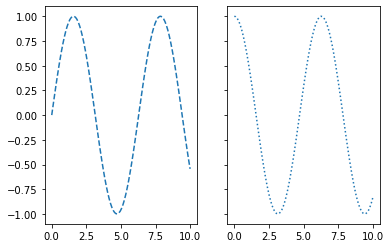

In [13]:
import matplotlib.pyplot as plt
plt.style.use("fast")
fig, ax = plt.subplots(1, 2, sharey=True)
x = np.linspace(0, 10, 100)
ax[0].plot(x, np.sin(x), linestyle="--")
ax[1].plot(x, np.cos(x), linestyle=":")

**Note:** `plt.axis("equal")` can be used to ensure equal aspect ratio for plots
### Matlab style VS OOP-style
```python
- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()
```
**OR use `ax.set()`:**  
`ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='sin(x)', title='A Simple Plot')`

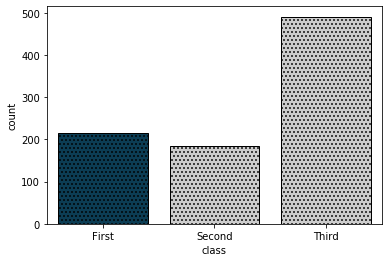

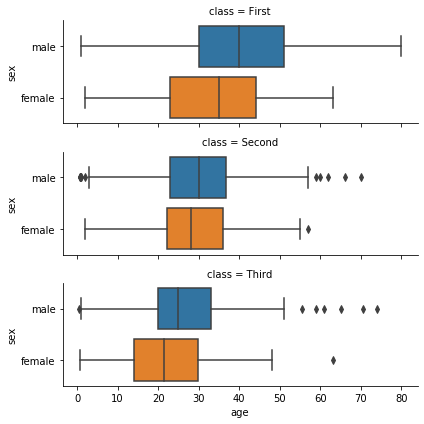

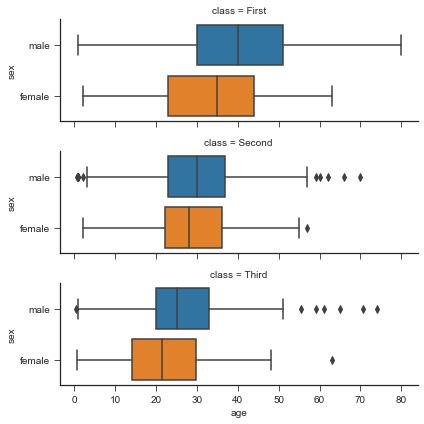

In [14]:
sns.countplot(data=df, x="class", edgecolor="black", palette=["#004260", "0.8", "0.8"], hatch="...")

with plt.style.context("fast"):
    sns.catplot(data=df, row="class",y="sex",x="age", kind="box", orient="h", height=2, aspect=3)
    plt.show()
    
with plt.style.context("seaborn-ticks"):
    sns.catplot(data=df, row="class",y="sex",x="age", kind="box", orient="h", height=2, aspect=3)
    plt.show()

## Annotating Plots


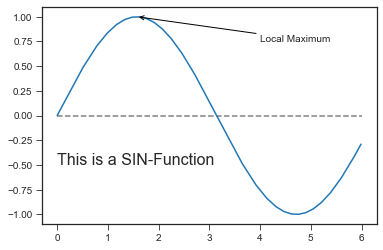

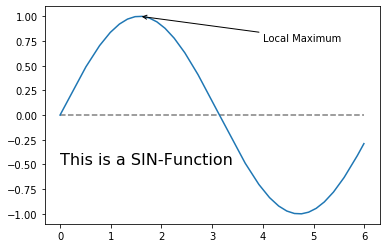

In [15]:
with plt.style.context("seaborn-ticks"):
    x = np.arange(0,6,0.01)
    plt.plot(x, np.sin(x))
    plt.text(0, -0.5, "This is a SIN-Function", size=16)
    plt.annotate("Local Maximum",xy=(np.pi/2, 1), xytext=(4, 0.75), arrowprops={"arrowstyle": "->"})
    plt.hlines(0, 0, 6, linestyles="--", colors="0.5")
    plt.show()

with plt.style.context("fast"):
    x = np.arange(0,6,0.01)
    plt.plot(x, np.sin(x))
    plt.text(0, -0.5, "This is a SIN-Function", size=16)
    plt.annotate("Local Maximum",xy=(np.pi/2, 1), xytext=(4, 0.75), arrowprops={"arrowstyle": "->"})
    plt.hlines(0, 0, 6, linestyles="--", colors="0.5")
    plt.show()


## Tickmarks
The number of ticks per axis can be manually manipulated.

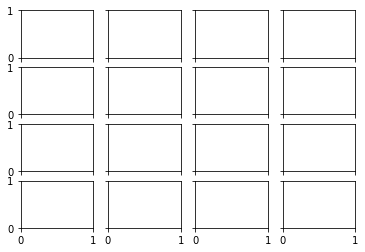

In [16]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(1))
    axi.yaxis.set_major_locator(plt.MaxNLocator(1))

In [17]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

# Machine Learning with *Scikit Learn*
## *sklearn* API
- All trained parameters of a model have a trailing _ (e.g. `m.coef__`)

## Validation Curves
- Are used for examining influence of *one parameter* to train- and test performance

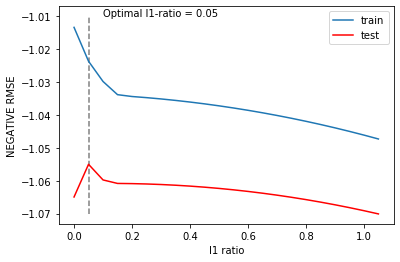

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import validation_curve, train_test_split

df = sns.load_dataset("tips")
# xtrain, xtest, ytrain, ytest = train_test_split(df.drop("tip"), df.tip)
df = pd.get_dummies(df)
dfx = df.drop("tip", axis=1).copy()
dfy = df.tip.copy()

m = ElasticNet()
xindex = np.arange(0,1.1,0.05)
train_performance, test_performance = validation_curve(m, dfx, dfy, "l1_ratio", xindex, scoring="neg_mean_squared_error", n_jobs=-1)
train_performance = [np.mean(r) for r in train_performance]
test_performance = [np.mean(r) for r in test_performance]

with plt.style.context("fast"):
    fig, ax = plt.subplots(1,1)
    ax.plot(xindex, train_performance, label="train")
    ax.plot(xindex, test_performance, label="test", color="red")
    ax.set_xlabel("l1 ratio")
    ax.set_ylabel("NEGATIVE RMSE")
    plt.vlines(0.05, -1.07, -1.01, colors="0.5", linestyles="--")
    ax.annotate("Optimal l1-ratio = 0.05", (0.1, -1.01))
    ax.legend()

## Naive Bayes
Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For **very high-dimensional data**, when model complexity is less important

## Linear Regression
- To capture non-linearities in the data, use *sklearn*'s `PolynomialFeatures() in preprocessing`
- instead of using a sum of polynomials as a basis function, one can use a sum of Gaussian basis functions (not implemented in *sklearn*)


tbc 394